In [4]:
import numpy as np
import pylab as p

# Definition of parameters 
a = 1.
b = 0.1
c = 1.5
d = 0.75

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1],  
                  -c*X[1] + d*b*X[0]*X[1] ])


In [5]:
dX_dt(np.array([1,30]))

array([ -2.  , -42.75])

In [6]:
X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])
np.all(dX_dt(X_f0) == np.zeros(2) ) and np.all(dX_dt(X_f1) == np.zeros(2))

True

In [7]:
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return np.array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])  

In [8]:
A_f1 = d2X_dt2(X_f1)  
A_f1

array([[ 0.  , -2.  ],
       [ 0.75,  0.  ]])

In [9]:
lambda1, lambda2 = np.linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
lambda1,lambda2

(1.224744871391589j, -1.224744871391589j)

In [10]:
T_f1 = 2*np.pi/np.abs(lambda1)                # >>> 5.130199
T_f1

5.130199320647456

In [11]:
from scipy import integrate



In [12]:
from matplotlib import pylab

t = np.linspace(0, 15,  100)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes  

X,infodict=integrate.odeint(dX_dt, X0, t, full_output=True)
#pylab.plot(t,X[:,0])
#pylab.plot(t,X[:,1])
infodict["message"]


'Integration successful.'

In [ ]:
#integrate.odeint?

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

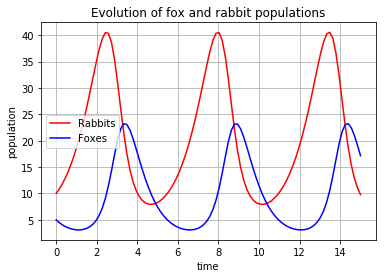

In [15]:
rabbits, foxes = X.T

f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')


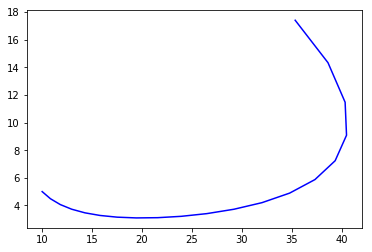

In [33]:
X0
p.plot( rabbits[:20], foxes[:20], "-", color="b", label='trajektoria' )

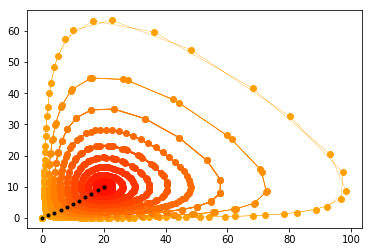

In [17]:
values  = np.linspace(0, 1, 11)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory figure
f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors): 
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)     # we don't need infodict here
    p.plot( X[:,0], X[:,1], "o-",lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    p.plot(X[0,0],X[1,1],".k",label="")

(0, 71.5502267667279)

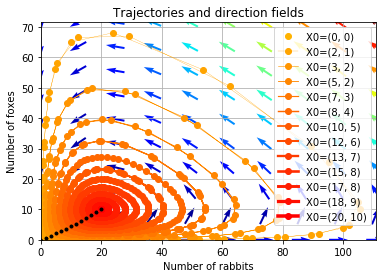

In [52]:
values  = np.linspace(0, 1, 13)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory figure
f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors): 
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)     # we don't need infodict here
    p.plot( X[:,0], X[:,1], "o-",lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    p.plot(X[0,0],X[1,1],".k",label="")
    
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1] 
nb_points   = 10                      

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                          # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M       

p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)

In [20]:
def IF(X):
    u, v = X
    return u**(c/a) * v * np.exp( -(b/a)*(d*u+v) )

# We will verify that IF remains constant for different trajectories
for v in values[1:-1]:
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print(v,delta)
nb_points = 80                              # grid size 


0.1 0.00031307442317651655
0.2 0.00011780873150982656
0.30000000000000004 6.020029417324902e-05
0.4 1.8283333119081382e-05
0.5 1.644332722516525e-05
0.6000000000000001 1.7914929653802543e-05
0.7000000000000001 1.4527026849581156e-05
0.8 5.644828703762494e-06
0.9 4.6685453637087216e-06


In [21]:
def IF(X):
    u, v = X
    return u**(c/a) * v * np.exp( -(b/a)*(d*u+v) )

# We will verify that IF remains constant for different trajectories
for v in values: 
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print(v,delta)
nb_points = 80                              # grid size 

x = np.linspace(0, xmax, nb_points)    
y = np.linspace(0, ymax, nb_points)

X2 , Y2  = np.meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point

f3 = p.figure()
CS = p.contourf(X2, Y2, Z2, cmap=p.cm.Purples_r, alpha=0.5)
CS2 = p.contour(X2, Y2, Z2, colors='black', linewidths=2. )
p.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
p.grid()
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.ylim(1, ymax)
p.xlim(1, xmax)
p.title('IF contours')

0.0 nan
0.1 0.00031307442317651655
0.2 0.00011780873150982656
0.30000000000000004 6.020029417324902e-05
0.4 1.8283333119081382e-05
0.5 1.644332722516525e-05
0.6000000000000001 1.7914929653802543e-05
0.7000000000000001 1.4527026849581156e-05
0.8 5.644828703762494e-06
0.9 4.6685453637087216e-06
1.0 0.0


/home/bartek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


NameError: name 'xmax' is not defined

In [ ]:
A=np.arange(4).reshape((2,2))

In [ ]:
A.T # transpozycja macierzy